# Практика

In [99]:
# библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as sts
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Определение вероятности. События

Требуется сгенерировать необходимые выборки и произвести по ним расчеты

### Задача 1
Брошено две монеты. Найти вероятность того, что монеты выпали разными сторонами

В данном случае существуют 2 несовместных варианта, при которых на монетах выпадут разные стороны:
A) 1О – 2Р;
B) 1Р – 2О;
Где 1, 2 – монеты, О – орел, Р – решка.
Их общую вероятность можно посчитать как вероятность суммы несовместных событий P(С):
P(С) = P(A) + P(B).
Вероятность варианта A посчитаем как произведение вероятностей независимых событий (выбрасываний 2-х монет):
P(A) = p1 * (1 - p2),
Где p1 - вероятность выпадения на первой монете орла, (1 - p2) – вероятность выпадения на второй монете решки.
Рассчитаем вероятность события B:
P(B) = (1 - p1) * p2,
Где (1 - p1)  - вероятность выпадения на первой монете решки, p2 – вероятность выпадения на второй монете орла.
Определим вероятность искомого события:
P(С) = p1 * (1 - p2) + (1 - p1) * p2;
P(С) = 0,5 * (1 – 0,5) + (1 – 0,5) * 0,5 = 0,5.

In [100]:
# имеем 2 монеты
M1 = ["Reshka", "Orel"]
M2 = ["Reshka", "Orel"]
# число бросков
n = 100000
# формируем выборку
df = pd.DataFrame({'A': pd.Series(np.random.choice(M1, n)),
                   'B': pd.Series(np.random.choice(M2, n))})

In [101]:
%%time
# способ №1 вероятность того, что монеты выпали разными сторонами
(df[(df.A == 'Orel') & (df.B == 'Reshka')].shape[0] + df[(df.B == 'Orel') & (df.A == 'Reshka')].shape[0]) / df.shape[0]

CPU times: total: 78.1 ms
Wall time: 82 ms


0.49958

In [102]:
%%time
# способ №2 вероятность того, что монеты выпали разными сторонами
i = 0
for j in range(n):
        if df.A.iloc[j] != df.B.iloc[j]:
               i+=1
i / n

CPU times: total: 7.03 s
Wall time: 7.21 s


0.49958

### Задача 2
Брошено три монеты. Описать множество всех элементарных событий. Найти вероятности следующих событий:


1.   A = {не выпало ни одного герба}
2.   B = {выпало четное число гербов}
3.   C = {на третьей монете выпал герб}


In [103]:
# имеем 3 монеты
M1 = ["Reshka", "Gerb"]
M2 = ["Reshka", "Gerb"]
M3 = ["Reshka", "Gerb"]
# число бросков
n = 1000000
# формируем выборку
df = pd.DataFrame({'A': pd.Series(np.random.choice(M1, n)),
                   'B': pd.Series(np.random.choice(M2, n)),
                   'C': pd.Series(np.random.choice(M3, n))})

In [104]:
# 1. A = {не выпало ни одного герба}. Вероятность
df[(df.A != 'Gerb') & (df.B != 'Gerb') & (df.C != 'Gerb')].shape[0] / df.shape[0]

0.124959

In [105]:
# 2. B = {выпало четное число гербов}. Вероятность
(df[(df.A == 'Gerb') & (df.B == 'Gerb') & (df.C != 'Gerb')].shape[0] +
df[(df.A == 'Gerb') & (df.B != 'Gerb') & (df.C == 'Gerb')].shape[0] +
df[(df.A != 'Gerb') & (df.B == 'Gerb') & (df.C == 'Gerb')].shape[0]) / df.shape[0]

0.375539

In [106]:
# 3. C = {на третьей монете выпал герб}. Вероятность
df[df.C == 'Gerb'].shape[0] / df.shape[0]

0.500037

Предлагается также решить задачи: 

### Задача 3
Из двух претендентов E и L на ответственную должность три члена комиссии должны отобрать одного. Каждый член комиссии должен указать либо одного достойного, либо забраковать обоих. Претендент считается выбранным, если он был признана достойным хотя бы двумя членами комиссии.
Найти вероятность событий:

A = {рекомендован L}, B = {рекомендован E}


In [107]:
# имеем три члена комиссии
# имеем двух претендентов E и L
# Каждый член комиссии принимает одно из трех решений:
# E–рекомендовать претендента E, L–рекомендовать претендента L, O–никого не рекомендовать.
K1 = ["E", "L", "O"]
K2 = ["E", "L", "O"]
K3 = ["E", "L", "O"]
# количество выбора претендента
n = 10000
# формируем выборку
df = pd.DataFrame({'A': pd.Series(np.random.choice(K1, n)),
                   'B': pd.Series(np.random.choice(K2, n)),
                   'C': pd.Series(np.random.choice(K3, n))})

In [108]:
# вероятность событий: A = {рекомендован L}, B = {рекомендован E}
i = 0
for j in range(n):
        if df.A.iloc[j] == df.B.iloc[j] == "L" or df.A.iloc[j] == df.C.iloc[j] == "L" or df.C.iloc[j] == df.B.iloc[j] == "L":
               i+=1
i / n

0.2618

### Задача 4
Брошено две игральных кости. Описать множество элементарных событий. Найти вероятности событий:

A = {вышло две "шестерки"}

B = {сумма выпавших очков не меньше 11}

C = {не выпала ни одна "шестерка"}

In [109]:
# имеем две игральные кости
S1 = [1, 2, 3, 4, 5, 6]
S2 = [1, 2, 3, 4, 5, 6]
# количество бросаний
n = 100000
# формируем выборку
df = pd.DataFrame({'A': pd.Series(np.random.choice(S1, n)),
                   'B': pd.Series(np.random.choice(S2, n))})

In [91]:
# 1. A = {вышло две "шестерки"}. Вероятность
df[(df.A == 6) & (df.B == 6)].shape[0] / df.shape[0]

0.02797

In [110]:
# 2. B = {сумма выпавших очков не меньше 11}. Вероятность
i = 0
for j in range(n):
        if (df.A.iloc[j] + df.B.iloc[j]) >= 11:
               i+=1
i / n

0.08434

In [111]:
# 3. C = {не выпала ни одна "шестерка"}. Вероятность
df[(df.A != 6) & (df.B != 6)].shape[0] / df.shape[0]

0.69502

## Вероятность суммы событий

### Задача 5
Брошены две игральные кости. Найти вероятность события D = {выпала хотя бы одна шестёрка}


In [112]:
# имеем две игральные кости
S1 = [1, 2, 3, 4, 5, 6]
S2 = [1, 2, 3, 4, 5, 6]
# количество бросаний
n = 100000
# формируем выборку
df = pd.DataFrame({'A': pd.Series(np.random.choice(S1, n)),
                   'B': pd.Series(np.random.choice(S2, n))})

In [113]:
# вероятность события D = {выпала хотя бы одна шестёрка}
i = 0
for j in range(n):
        if df.A.iloc[j] == 6 or df.B.iloc[j] == 6:
               i+=1
i / n

0.3056

Предлагается также решить задачи: 

### Задача 6
В телефонном номере три последние цифры стерлись. Считая, что все возможные значения стершихся цифр равновероятны, найти вероятность событий:

A = {Стерлись различные цифры},

B = {Стерлись одинаковые цифры},

C = {Среди стершихся цифр хотя бы две совпадают},

D = {Среди стершихся цифр хотя бы две различны}


In [114]:
# имеем три последние цифры
C1 = list(range(10))
C2 = list(range(10))
C3 = list(range(10))
# количество выбороы
n = 100000
# формируем выборку
df = pd.DataFrame({'A': pd.Series(np.random.choice(C1, n)),
                   'B': pd.Series(np.random.choice(C2, n)),
                   'C': pd.Series(np.random.choice(C2, n))})

In [115]:
# 1. A = {Стерлись различные цифры}. Вероятность
i = 0
for j in range(n):
        if df.A.iloc[j] != df.B.iloc[j] != df.C.iloc[j]:
               i+=1
i / n

0.81078

In [116]:
# 2. B = {Стерлись одинаковые цифры}. Вероятность
i = 0
for j in range(n):
        if df.A.iloc[j] == df.B.iloc[j] == df.C.iloc[j]:
               i+=1
i / n

0.01003

In [117]:
# 3. C = {Среди стершихся цифр хотя бы две совпадают}. Вероятность
i = 0
for j in range(n):
        if df.A.iloc[j] == df.B.iloc[j] or df.A.iloc[j] == df.C.iloc[j] or df.B.iloc[j] == df.C.iloc[j]:
               i+=1
i / n

0.28023

In [118]:
# 4. D = {Среди стершихся цифр хотя бы две различны}. Вероятность
i = 0
for j in range(n):
        if df.A.iloc[j] != df.B.iloc[j] or df.A.iloc[j] != df.C.iloc[j] or df.B.iloc[j] != df.C.iloc[j]:
               i+=1
i / n

0.98997

## Случайные величины

### Задача 7
В лотерее имеется 10 билетов, из которых один выигрышный. Размер выигрыша 10 ден. ед.; стоимость билета 1 ден ед. Найти закон распределения случайной величины X, равной чистому выигрышу участника лотереи, который вытаскивает билет первым.

In [119]:
# Значения выигрыша X: x1 = 10, x2= 0
# Вероятности: p1=0.1, p2=1-0.1=0.9

In [121]:
# Распределение Бернулли
bernoulli_rv = sts.bernoulli(0.1) # вероятность успеха
bernoulli_rv.rvs(10)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

[]

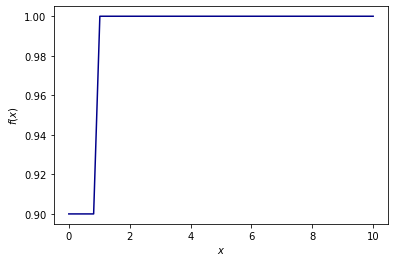

In [123]:
x = np.linspace(0,10)
cdf = bernoulli_rv.cdf(x) # вернёт массив из значений функции распределения
plt.plot(x, cdf, color="darkblue")
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.plot()

[]

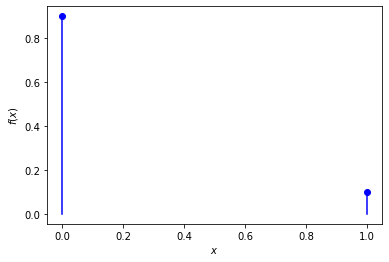

In [124]:
# Функция вероятности pmf для дискретных случайных величин
x = np.linspace(0,1,2)
pmf = bernoulli_rv.pmf(x) # вернёт массив из значений функции распределения
plt.scatter(x, pmf, color="blue" )
plt.plot((0,0), (0,bernoulli_rv.pmf(0)), color="blue")
plt.plot((1,1), (0,bernoulli_rv.pmf(1)), color="blue")
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.plot()

Предлагается также решить задачу: 

### Задача 8
Брошены две игральные кости. Найти закон распределения случайной величины $X$, равной сумме выпавших очков. Найти вероятности событий ${X <= 4}$, ${X > 4}$

In [125]:
# имеем две игральные кости
S1 = [1, 2, 3, 4, 5, 6]
S2 = [1, 2, 3, 4, 5, 6]
# количество бросаний
n = 100000
# формируем выборку
df = pd.DataFrame({'A': pd.Series(np.random.choice(S1, n)),
                   'B': pd.Series(np.random.choice(S2, n))})

In [126]:
# вероятность события 𝑋<=4 (p1), 𝑋>4 (p2)
i = 0
for j in range(n):
        if (df.A.iloc[j] + df.B.iloc[j]) <= 4:
               i+=1
p1 = i / n
p2 = 1-p1
print(p1)
print(p2)

0.16819
0.8318099999999999


## Условные вероятности

### Задача 9
Из колоды (36 карт) вынимают последовательно без возвращения две карты. Найти вероятность того, что первой картой была шестерка, а второй — семерка. Найти условную вероятность того же события при условии, что обе карты бубновой масти.


вероятность получить первой картой шестерку 4/36
вероятность получить второй картой семерку 4/35
вероятность того же события при условии, что обе карты бубновой масти 9/36 * 8/35 = 72/1260

In [127]:
# создаем колоду карт n = 36
Bubi = ['6b','7b','8b','9b','10b','Vb','Db','Kb','Tb']
Kresti = ['6k','7k','8k','9k','10k','Vk','Dk','Kk','Tk']
Chervi = ['6c','7c','8c','9c','10c','Vc','Dc','Kc','Tc']
Piki = ['6p','7p','8p','9p','10p','Vp','Dp','Kp','Tp']
koloda = Bubi + Kresti + Chervi + Piki
n = 10000 # количество выбора карты

In [137]:
# вероятность получить первой картой шестерку 4/36
# random.shuffle(koloda) # перемешиваем колоду
lst = [random.choices(koloda)[0] for i in range(n)] # выбираем 1 карту
i = 0
for j in lst:
    if j in ['6b','6k','6c','6p']:
               i+=1
i / n

0.111

In [139]:
# вероятность получить второй картой семерку 4/35 (способ1)
lst = [random.choices(koloda, k = 2)[1] for i in range(n)] # выбираем 2 карту
i = 0
for j in lst:
    if j in ['7b','7k','7c','7p']:
               i+=1
i / n

0.1167

In [142]:
# вероятность получить второй картой семерку 4/35 (способ2)
random.shuffle(koloda) # перемешиваем колоду
lst = [random.choices(koloda, k = 2) for i in range(n)]
df = pd.DataFrame(lst)
i = 0
for j in range(n):
    if df[1].iloc[j] in ['7b','7k','7c','7p']:
               i+=1

i / n

0.1137

In [146]:
# вероятность того же события при условии, что обе карты бубновой масти 9/36 * 8/35 = 72/1260
# создаем колоду карт n = 36
Bubi = ['b'] * 9
Kresti = ['k'] * 9
Chervi = ['c'] * 9
Piki = ['p'] * 9
koloda = Bubi + Kresti + Chervi + Piki
Bubi1 = ['b'] * 8
koloda1 = Bubi1 + Kresti + Chervi + Piki # колода первая карта буби
n = 100000 # количество выбора карты
# random.shuffle(koloda) # перемешиваем колоду
# вероятность извлечь первую карту буби
lst = [random.choices(koloda)[0] for i in range(n)]
i = 0
for j in lst:
    if j == 'b':
        i+=1
        
p1 = i / n
# вероятность извлечь вторым белый шар
lst1 = [random.choices(koloda1)[0] for i in range(n)]
c = 0
for j in lst1:
    if j == 'b':
        c+=1
p2 = c / n
p = p1 * p2
p

0.0573778507

In [148]:
lst = [random.choices(koloda, k = 2) for i in range(n)]
df = pd.DataFrame(lst)
i = 0
for j in range(n):
    if df[0].iloc[j] == df[1].iloc[j] == 'b' :
               i+=1

i / n

0.06072

Предлагается также решить задачу: 

### Задача 10
Из урны, содержащей два белых и три черных шара, последовательно извлекают два шара; вынутые шары не возвращаются. Если первый шар оказался черным, то перед вторым извлечением в урну добавляют белый шар. В противном случае состав оставшихся шаров не меняют. Найти вероятности событий:

$A$ = {извлечены два белых шара},

$B$ = {извлечены два черных шара}

Указание. Пусть событие $C_1$ = {первый шар белый}, событие $C_2$ = {второй шар белый}. Тогда $A = C_1C_2$, $B = \overline C_1 \overline C_2$ 

вероятность извлечь первым белый шар равняется 2/5, а вытащить вторым подряд 1/4.

2/5*1/4=2/20=10/100=0.1

Вероятность извлечь первым чёрный равняется 3/5 и добавляется белый шар, следовательно извлечь второй чёрный равняется 2/5.

3/5*2/5=6/25=24/100=0.24

In [46]:
# заполняем урну
C = ["white"]*2 + ['black']*3
C1 = ["white"] + ['black']*3 # урна первый шар белый
C2 = ["white"]*3 + ['black']*2 # урна первый шар черный
n = 100000 # количество выбора урна

In [52]:
# 1. 𝐴  = {извлечены два белых шара}. Вероятность 
lst = [random.choices(C)[0] for i in range(n)]
# вероятность извлечь первым белый шар
i = 0
for j in lst:
    if j == 'white':
               i+=1
p1 = i / n
# вероятность извлечь вторым белый шар
lst1 = [random.choices(C1)[0] for i in range(n)]
c = 0
for j in lst1:
    if j == 'white':
               c+=1
p2 = c / n
p = p1 * p2
p

0.101015236

In [54]:
# 2. 𝐵  = {извлечены два черных шара}. Вероятность
# вероятность извлечь первым черный шар
lst = [random.choices(C)[0] for i in range(n)]
i = 0
for j in lst:
    if j == 'black':
               i+=1
p1 = i / n
# вероятность извлечь вторым черрный шар
lst1 = [random.choices(C2)[0] for i in range(n)]
c = 0
for j in lst1:
    if j == 'black':
               c+=1
p2 = c / n
p = p1 * p2
p

0.23964198399999997